# Conservation plots

In [8]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src import constants as C
from src.visualisation import colour_tools as cl

In [9]:
# MODULE CONSTANTS
_PLT = cl.colour_palette()
_REGION_ORDER = ["transcript", "nmd_target", "start_proximal", "long_exon", "distal_nmd"]
_REGION_LABELS = ["Full transcript", "NMD target", "Start proximal", "Long exon", "Distal"]
_CONSTRAINT_ORDER = ["all", "constrained", "unconstrained"]
_CONSTRAINT_LABELS = ["All", "Constrained", "Unconstrained"]
_METRICS = ["phylop", "alpha_mis", "pext"]

## Load and clean data

In [10]:
# Read the data
df = pd.read_csv(C.PHYLOP_PEXT_MISSENSE_STATS, sep="\t")

# Order by region
df["region"] = pd.Categorical(df["region"], categories=_REGION_ORDER, ordered=True)
df = df.sort_values("region", ascending=False)

# Drop regions in which constraint is indeterminate (NaN)
df = df.dropna(subset="constraint")

# Split by metric
phylop, am, pext = [df[df["metric"] == x] for x in _METRICS]

In [11]:
am

,region,constraint,metric,mean,n,sem,ci_95
50,distal_nmd,unconstrained,alpha_mis,0.279877,1752135,0.000210,0.000412
45,distal_nmd,constrained,alpha_mis,0.379032,357900,0.000570,0.001117
40,distal_nmd,all,alpha_mis,0.306169,4220763,0.000145,0.000284
51,long_exon,unconstrained,alpha_mis,0.231481,325343,0.000431,0.000845
46,long_exon,constrained,alpha_mis,0.264582,282839,0.000529,0.001037
41,long_exon,all,alpha_mis,0.239621,1439416,0.000213,0.000417
43,start_proximal,all,alpha_mis,0.285919,1613729,0.000229,0.000449
48,start_proximal,constrained,alpha_mis,0.475622,10362,0.003558,0.006973
53,start_proximal,unconstrained,alpha_mis,0.298814,107389,0.000900,0.001764
52,nmd_target,unconstrained,alpha_mis,0.310191,3161618,0.000165,0.000324


## Horizontal bar plot

In [12]:
colors = [_PLT.grey, _PLT.red, _PLT.blue]
cm = 1 / 2.54  # cm to inches converter

In [13]:
def plot_metrics_by_region(
    df,
    ax,
    metric="phylop",
    constraint="constrained",
    legend=False,
    xlabel=False,
):
    # Define colors
    color = _PLT.black
    if constraint == "constrained":
        color = _PLT.red
    if constraint == "unconstrained":
        color = _PLT.grey
    if constraint == "all":
        color = cl.adjust_lightness(_PLT.grey, 0.5)

    # Subset the data
    df = df[df["constraint"] == constraint]

    # Horizontal bar plot
    n = len(df)
    y = np.arange(n)
    x = df[metric]
    xerr = df["ci_95"]

    ax.barh(
        y=y * 1 / n,
        height=1 / (n + 1),
        width=x,
        color=color,
        xerr=xerr,
        ecolor=cl.adjust_lightness(color, 0.7)
    )

    ax.set_yticks(ticks=y * 1 / n, labels=reversed(_REGION_LABELS))
    ax.tick_params(axis="y", length=0)

    if legend:
        ax.set_title(legend, loc="left", c=color)
        
    if xlabel:
        ax.set_xlabel(xlabel)

    # ax.spines["left"].set_position(("outward", 5))
    # ax.spines["left"].set_visible(False)

    return None

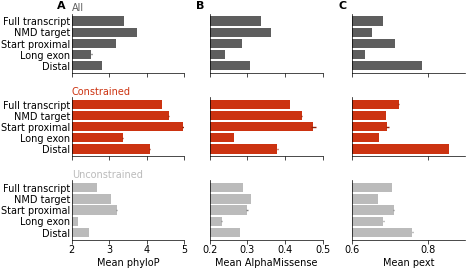

In [19]:
# Instantiate the figure
fig, axs = plt.subplots(
    3,
    3,
    figsize=(12 * cm, 7 * cm),
    layout="constrained",
    gridspec_kw={"hspace": 0.1, "wspace":0.05},
    sharey=True,
    sharex="col"
)
axs = axs.flatten()

# Plots
## First column
plot_metrics_by_region(phylop, axs[0], "mean", "all", legend="All")
plot_metrics_by_region(phylop, axs[3], "mean", "constrained", legend="Constrained")
plot_metrics_by_region(
    phylop, axs[6], "mean", "unconstrained", legend="Unconstrained", xlabel="Mean phyloP"
)

## Second column
plot_metrics_by_region(am, axs[1], "mean", "all")
plot_metrics_by_region(am, axs[4], "mean", "constrained")
plot_metrics_by_region(am, axs[7], "mean", "unconstrained", xlabel="Mean AlphaMissense")

## Third column
plot_metrics_by_region(pext, axs[2], "mean", "all")
plot_metrics_by_region(pext, axs[5], "mean", "constrained")
plot_metrics_by_region(pext, axs[8], "mean", "unconstrained", xlabel="Mean pext")

# Set x limits (sharex=True)
axs[0].set_xlim(2, 5)
axs[1].set_xlim(0.2, 0.5)
axs[2].set_xlim(0.6, 0.9)

# Add panel labels
Axes = [axs[x] for x in [0, 1, 2]]
labels = list("ABC")

for a, l in zip(Axes, labels):
    cl.panel_label(a,l)
    
# Save to output
plt.savefig("data/plots/figures/fig_03.svg", format="svg")
plt.savefig("data/plots/figures/fig_03.png", format="png", dpi=1000)
